<a href="https://colab.research.google.com/github/ebatty/CodingBootcamp/blob/main/content/Session2_Exercises_Solutions.ipynb" target="_blank"><img alt="Open In Colab" src="https://colab.research.google.com/assets/colab-badge.svg"/></a>

# Session 2 Exercise Solutions


## Your name here

# Image Manipulation

The next cell automatically downloads the image (file name dog.jpg) and loads it in directly as numpy array img.
Loading in data that exists locally (if you are using a jupyter notebook for example) isn’t as complicated.

You could use plt.imread('dog.jpg', format = 'jpg') If you’d like to download the data locally, you can get it from https://osf.io/35azg/.

In [1]:
# weird code you can ignore for now

import requests
import io
import matplotlib.pyplot as plt
import numpy as np

r = requests.get('https://osf.io/35azg/download')

img = plt.imread(io.BytesIO(r.content), format = 'jpg')


1. Print the entry in the third row and second column of the image

In [3]:
print(img[2, 1])

133


2. Print the second row of the image

In [4]:
print(img[1, :])

[132 132 132 132 132 132 132 132 134 134 134 134 134 134 134 134 134 134
 134 134 134 134 134 134 134 134 134 134 134 134 134 134 134 134 134 134
 134 134 134 134 133 133 133 133 133 133 133 133 134 134 134 134 134 134
 134 134 133 133 133 133 133 133 133 133 133 133 133 133 133 133 133 133
 132 132 132 132 132 132 132 132 131 131 131 131 131 131 131 131 131 131
 131 131 131 131 131 131 132 132 132 132 132 132 132 132 131 131 131 131
 131 131 131 131 132 132 132 132 132 132 132 132 131 131 131 131 131 131
 131 131 131 131 131 131 131 131 131 131 132 132 132 132 132 132 132 132
 132 132 132 132 132 132 132 132 131 131 131 131 131 131 131 131 131 131
 131 131 131 131 131 131 132 132 132 132 132 132 132 132 132 132 132 132
 132 132 132 132 132 132 132 132 132 132 132 132 131 131 131 131 131 131
 131 131 131 131 131 131 131 131 131 131 130 130 131 131 131 132 132 132
 131 131 131 131 131 131 131 131 131 131 131 131 131 131 131 131 130 130
 130 130 130 130 130 130 130 130 130 130 130 130 13

3. Make the element in row 1 and column 2 equal to 0.

In [5]:
# First let's copy the image so we don't overwrite our original image
new_img = img.copy()

new_img[0, 1] = 0

4. Create a new version of img where the 20 columns on the left and right edge of the image are equal to the minimum of the image.

This is a little tricky! Try to break the problem down into smaller steps. You do not need to use one line of code.

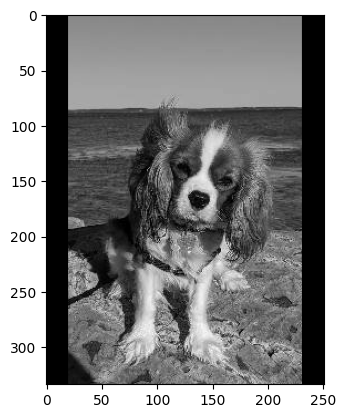

In [6]:
# First let's copy the image so we don't overwrite our original image
new_img = img.copy()

new_img[:, :20] = np.min(img)
new_img[:, -20:] = np.min(img)

plt.imshow(new_img, cmap = 'gray')

**The following questions are more advanced and super optional.**

5. Create a new array containing two copies of Leo side by side using `np.concatenate`. We haven't shown you this command - take a look at the function documentation to help figure it out: https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html.


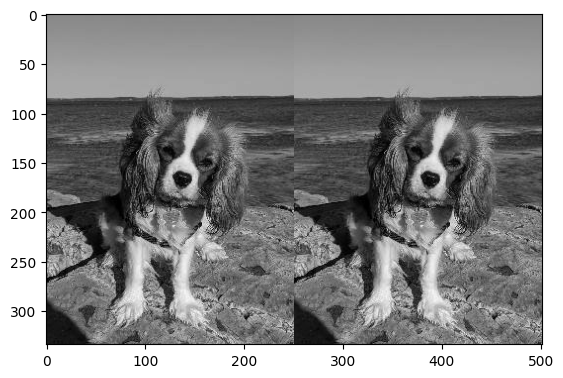

In [8]:
horiz_img = np.concatenate((img, img), axis=1)

plt.imshow(horiz_img, cmap = 'gray')

6. It's snowing! Let's add some noise to the image and see what it looks like. Create an array the same size as img but containing uniformly distributed random numbers between 0 and 40. Add this noise to img and store as noisy_img. Type the line of code.
Hint: check out the documentation for https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html







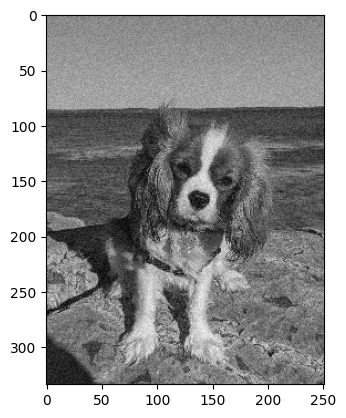

In [9]:
np.random.seed(0)

noisy_img = img + np.random.uniform(0, 40, size=np.shape(img))

plt.imshow(noisy_img, cmap = 'gray')

# Working with Spikes Data Part 2

Recall Working with Spikes Data from the previous session:

You worked with an array of spikes counts where the rows were different trials, the columns are different time bins, and the entries were the spike counts during that time bin in that trial. Each time bin is 1 ms.

This data was simulated but mimicked a situation where a monkey was performing a task where they make repeated reaching movements to the same target. The data was "recorded" from a neuron in the monkey's motor cortex.


We are going to work with data in the same format again. We again have an array called `spikes`, but now we have 1000 trials. We have 1500 time bins and in each trial the reach movement onset happens at the 750th time bin.

The only change is that the reach movement on each trial will be to one of 8 target options, instead of the same target each time. We are going to refer to these target options by the angle of the reach to them.  `trial_angles` is an array of shape (1000,). Each entry contains the reaching angle on that trial.

The next cell loads in this data.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import requests
import io

r = requests.get('https://osf.io/m5tj3/download')
spikes = np.load(io.BytesIO(r.content))

r = requests.get('https://osf.io/af84k/download')
trial_angles = np.load(io.BytesIO(r.content))


dt = 0.001 # in seconds, each time bin is 1 ms

1. Use Boolean indexing to get the trials where the monkey was reaching to a target at 0 degrees. Save this array as a variable called `spikes_0`.



In [20]:
trials_to_0 = trial_angles == 0
spikes_0 = spikes[trials_to_0]

2. There should be 125 trials with a reach to angle of 0, so the array from Q1 should be 125 by 1500. Check the shape of `spikes_0` to make sure it is correct!

In [12]:
np.shape(spikes_0)

(125, 1500)

3. Compute the average firing rate over time of this neuron during trials to angle 0 (i.e. the average spike count per time bin). No need to convert to spikes per second, you can leave as spikes per time bin.

Hint: you did this in the session 1 exercises Q4

In [13]:
average_firing_rate = np.mean(spikes_0, axis=0)

4. Plot the average firing rate over time of this neuron during trials to angle 0. Label the x and y axis and add a title.

[Text(0.5, 0, 'Time bins'),
 Text(0, 0.5, 'Firing Rate (spikes/time bin)'),
 Text(0.5, 1.0, 'Responses to targets at angle 0')]

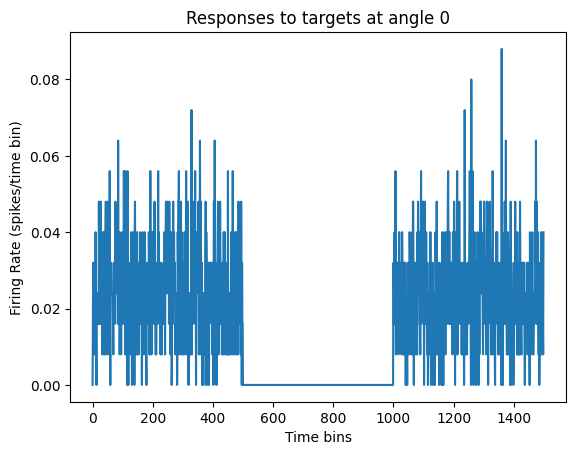

In [16]:
fig, ax = plt.subplots()

ax.plot(average_firing_rate)

ax.set(xlabel='Time bins',
       ylabel = 'Firing Rate (spikes/time bin)',
       title = 'Responses to targets at angle 0')

5. (Text answer) What happens to the activity of this neuron around movement reach onset (which happens at the 750th time bin)

The activity goes to 0 (the firing rate decreases).

6. We want to compute a single number that summarizes the neural firing rate during reaches to this angle. We only want to consider the time period immediately around the movement onset, so in time bins 500 up to 1000. Can you figure out how to get the average spike count in time bins 500 up to 1000 across all trials to reach angle of 0? Try to do it in 1 to 2 lines of code, starting with the original `spikes` data.



In [25]:
np.mean(spikes[trial_angles==0, 499:999])/dt

0.032

(Optional) 7. What is the single average firing rate in spikes per second for trials where the reach is to angle 135?

In [26]:
np.mean(spikes[trial_angles==135, 499:999])/dt

92.192

(Optional) 8. (Text answer) Given the two numbers in Q8 and 9, do you think this neuron's activity could be correlated with (i.e. varies with) the direction of reach?

The firing rate varying between close to 0 and 92 spikes per second is a large difference. It seems like the neuron activity is correlated with the direction of reach since it is so much higher for reaches to a target at angle 135 than to reaches to a target at angle 0.